In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin

In [2]:
df = pd.read_csv("./DataSet.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion


,Card,%_Card,Tipo
gender,2,0.2,object
race/ethnicity,5,0.5,object
parental level of education,6,0.6,object
lunch,2,0.2,object
test preparation course,2,0.2,object
math score,81,8.1,int64
reading score,72,7.2,int64
writing score,77,7.7,int64


In [8]:
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
gender,2,0.2,object,Binaria
race/ethnicity,5,0.5,object,Categorica
parental level of education,6,0.6,object,Categorica
lunch,2,0.2,object,Binaria
test preparation course,2,0.2,object,Binaria
math score,81,8.1,int64,Numerica Discreta
reading score,72,7.2,int64,Numerica Discreta
writing score,77,7.7,int64,Numerica Discreta


In [5]:
#Calculo la media para las variables numéricas
df.describe().loc["mean"]

math score       66.089
reading score    69.169
writing score    68.054
Name: mean, dtype: float64

In [6]:
#Calculo la moda para las variables categóricas, creando una tabla con las categóricas.
categoricas = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]
df[categoricas].mode().T

,0
gender,female
race/ethnicity,group C
parental level of education,some college
lunch,standard
test preparation course,none


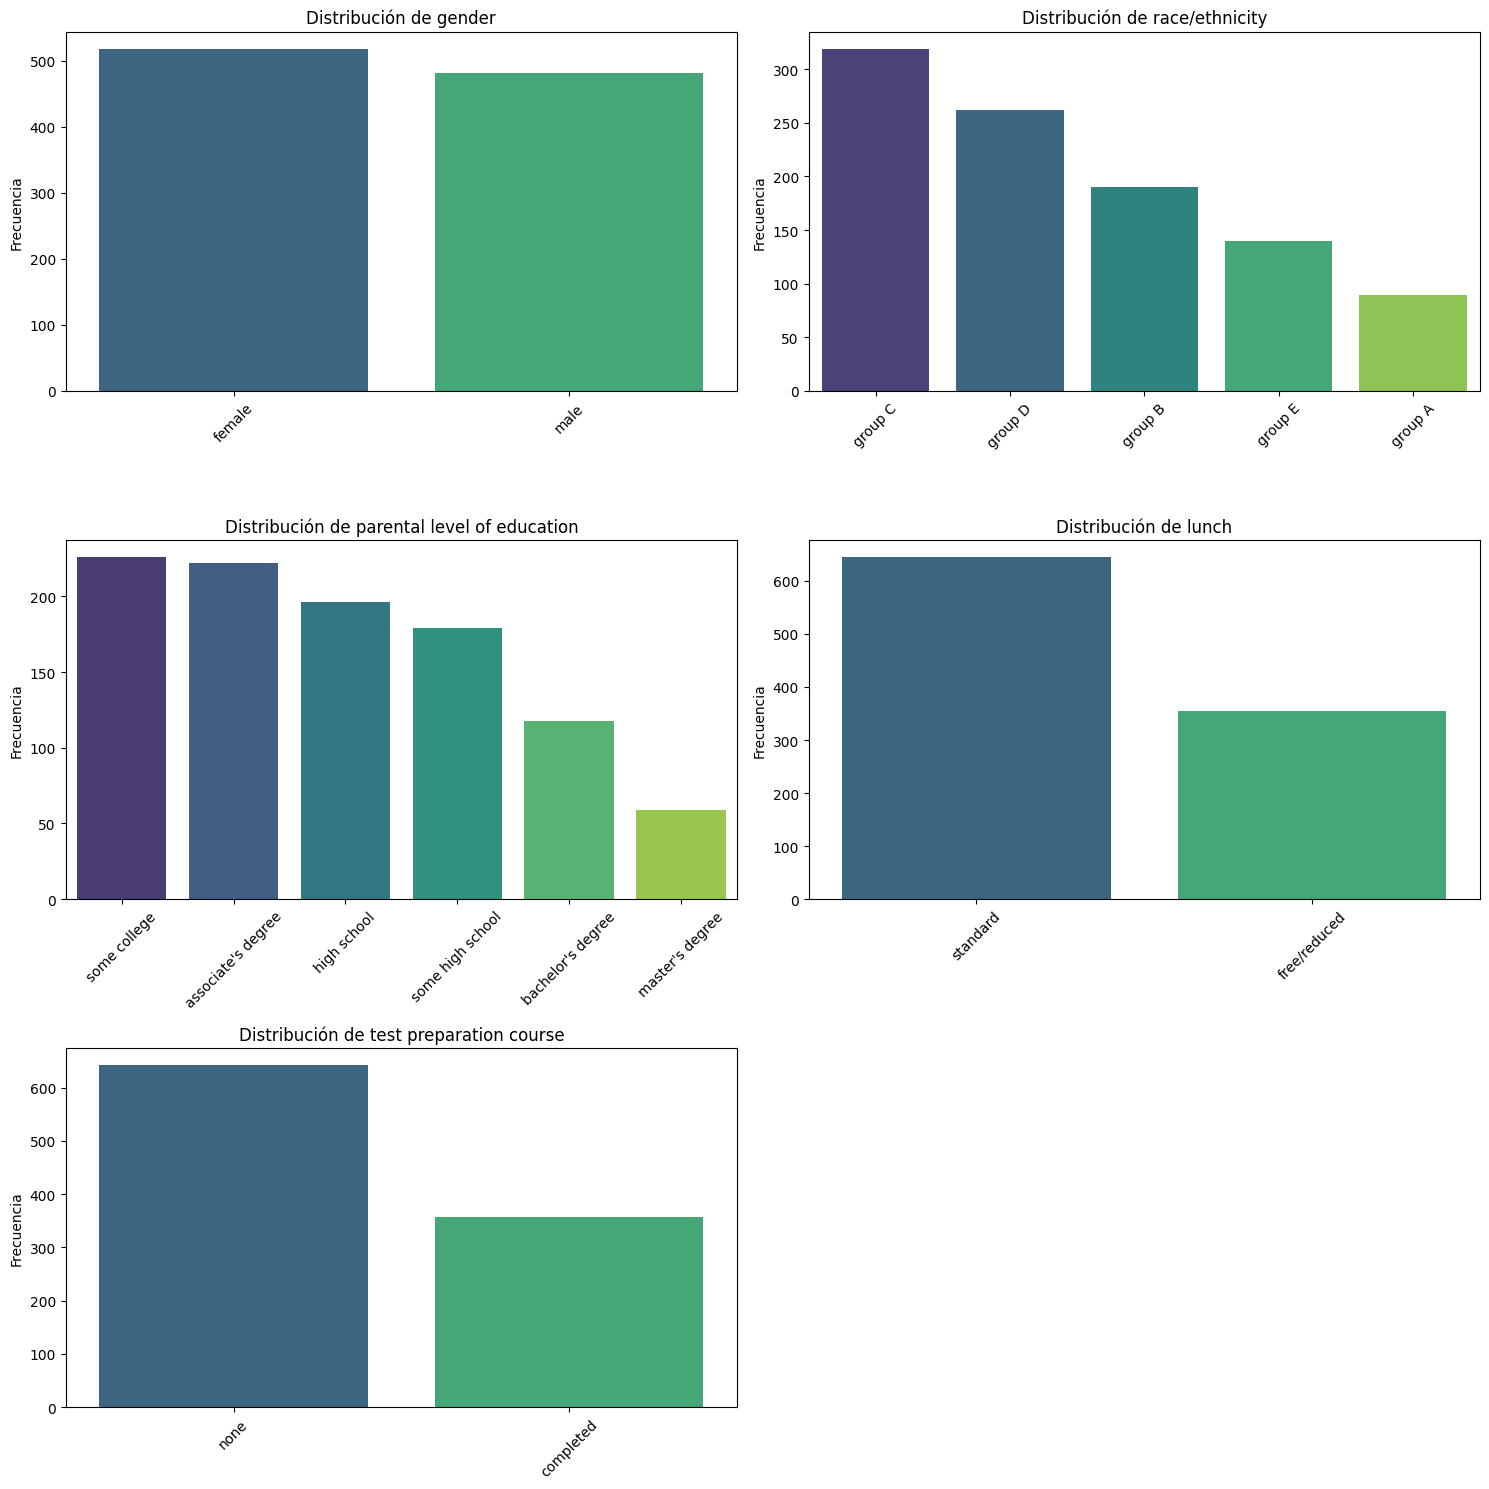

In [9]:
pinta_distribucion_categoricas(df, categoricas)